# DIVA-WOA comparison
Plotting the comparison between World Ocean Atlas (WOA) 2018 products and the climatologies created with `DIVAnd`.
1. Horizontal maps
2. Vertical sections

In [1]:
import os
import glob
import netCDF4
import logging
import numpy as np
import cmocean
import calendar
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import calendar
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
plt.rcParams.update({'font.size': 16})
plt.rc('figure', facecolor='w')
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry3/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [2]:
logger = logging.getLogger("EMODnet-Chemistry-WOA-DIVA")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [14]:
varname = "phosphate"
figdir = "f/home/ctroupin/dox/EMODnet-Chemistry/WOA-DIVA/{varname}/year/"
figdirmonth = f"/home/ctroupin/dox/EMODnet-Chemistry/WOA-DIVA/{varname}/monthly/"
#woadataurl = "https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc"
woadataurl = "https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/phosphate/all/1.00/woa18_all_p01_01.nc"
# divafile = "/data/EMODnet/Eutrophication/Products/Results-0.1/Water body dissolved oxygen concentration_background_test_it2000_800km.nc"
#divafile = "/data/EMODnet/Eutrophication/Products/Water body dissolved oxygen concentration-res-0.1-epsilon2-1.0-lenx-800000.0-maxit-2000/Water body dissolved oxygen concentration_background.nc"
#divafile = "/data/EMODnet/Eutrophication/Products/Water body dissolved oxygen concentration-res-0.25-epsilon2-1.0-lenx-250000.0-maxit-100-monthly/Results/Water body dissolved oxygen concentration_monthly.nc"
divafile = "/data/EMODnet/Eutrophication/Products/Water body phosphate-res-0.25-epsilon2-1.0-lenx-250000.0-maxit-100-monthly/Results/Water body phosphate_monthly.nc"

if not os.path.isdir(figdir):
    os.makedirs(figdir)
if not os.path.isdir(figdirmonth):
    os.makedirs(figdirmonth)

## Grid parameters

In [6]:
deltalon = 0.1
deltalat = 0.1
domain = [-45., 70., 24., 83.]
longrid = np.arange(domain[0], domain[1] + .0001, deltalon)
latgrid = np.arange(domain[2], domain[3] + .0001, deltalat)
if not os.path.exists(figdir):
    os.makedirs(figdir)

### Initiate projection

In [5]:
m = Basemap(projection='merc', llcrnrlon=domain[0], llcrnrlat=domain[2],
            urcrnrlon=domain[1], urcrnrlat=domain[3],
            lat_ts=0.5 * (domain[2] + domain[3]), resolution='i')

In [73]:
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry3/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [10]:
logger.info("Reading fields from WOA")
lon1, lat1, depth1, oxy1 = emodnetchemistry.read_oxy_woa(woadataurl, domain, filetype='woa')
logger.info("Found {} depth levels".format(len(depth1)))
logger.info("Reading fields from DIVAnd")
lon2, lat2, depth2, oxy2 = emodnetchemistry.read_oxy_woa(divafile, domain, filetype='diva')
logger.info("Found {} depth levels".format(len(depth2)))
llon1, llat1 = np.meshgrid(lon1, lat1)
llon2, llat2 = np.meshgrid(lon2, lat2)

INFO:EMODnet-Chemistry-WOA-DIVA:Reading fields from WOA
INFO:EMODnet-Chemistry-WOA-DIVA:Found 102 depth levels
INFO:EMODnet-Chemistry-WOA-DIVA:Reading fields from DIVAnd
INFO:EMODnet-Chemistry-WOA-DIVA:Found 33 depth levels


## Loop on the depths

In [76]:
for index2, d2 in enumerate(depth2[-2:]):
    logger.info("Working on depth {}".format(d2))
    index1 = np.where(depth1 == d2)[0][0]

    figname = os.path.join(figdir, "oxygen_DIVAnd_WOA_year_{}.jpg".format(str(int(d2)).zfill(4)))
    emodnetchemistry.plot_WOA_DIVAnd_comparison(m, llon1, llat1, oxy1[index1,:,:], 
                                                llon2, llat2, oxy2[index2,:,:], 
                                                d2, figname=figname, vmin=200, vmax=400., deltavar=25.,
                                                units=r"$\mu$moles/kg")

INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 5000.0
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 5500.0


## Monthly
We loop on the months, so the URL of the WOA file will be different.

In [15]:
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry3/EMODnet-Chemistry/python/emodnetchemistry.py'>

INFO:EMODnet-Chemistry-WOA-DIVA:Working on month February
INFO:EMODnet-Chemistry-WOA-DIVA:Reading fields from WOA
INFO:EMODnet-Chemistry-Data-positions:Variable name: p_an
INFO:EMODnet-Chemistry-Data-positions:Standard name: moles_concentration_of_phosphate_in_sea_water
INFO:EMODnet-Chemistry-WOA-DIVA:Found 43 depth levels
INFO:EMODnet-Chemistry-WOA-DIVA:[697.5]
INFO:EMODnet-Chemistry-WOA-DIVA:Reading fields from DIVAnd
INFO:EMODnet-Chemistry-Data-positions:Variable name: Water body phosphate
INFO:EMODnet-Chemistry-Data-positions:Long name: 
INFO:EMODnet-Chemistry-WOA-DIVA:Found 102 depth levels
INFO:EMODnet-Chemistry-WOA-DIVA:1995-02-16 00:00:00
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 0.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 0, index2 = 0
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 5.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 1, index2 = 1
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 10.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 2, index2 = 2
INFO:EMODnet-Chem

INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 95.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 19, index2 = 19
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 100.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 20, index2 = 20
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 125.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 21, index2 = 21
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 150.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 22, index2 = 22
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 175.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 23, index2 = 23
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 200.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 24, index2 = 24
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 225.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 25, index2 = 25
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 250.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 26, index2 = 26
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 275.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 

INFO:EMODnet-Chemistry-WOA-DIVA:Reading fields from WOA
INFO:EMODnet-Chemistry-Data-positions:Variable name: p_an
INFO:EMODnet-Chemistry-Data-positions:Standard name: moles_concentration_of_phosphate_in_sea_water
INFO:EMODnet-Chemistry-WOA-DIVA:Found 43 depth levels
INFO:EMODnet-Chemistry-WOA-DIVA:[700.5]
INFO:EMODnet-Chemistry-WOA-DIVA:Reading fields from DIVAnd
INFO:EMODnet-Chemistry-Data-positions:Variable name: Water body phosphate
INFO:EMODnet-Chemistry-Data-positions:Long name: 
INFO:EMODnet-Chemistry-WOA-DIVA:Found 102 depth levels
INFO:EMODnet-Chemistry-WOA-DIVA:1995-05-16 00:00:00
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 0.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 0, index2 = 0
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 5.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 1, index2 = 1
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 10.0
DEBUG:EMODnet-Chemistry-WOA-DIVA:index1 = 2, index2 = 2
INFO:EMODnet-Chemistry-WOA-DIVA:Working on depth 15.0
DEBUG:EMODnet-Chemist

KeyboardInterrupt: 

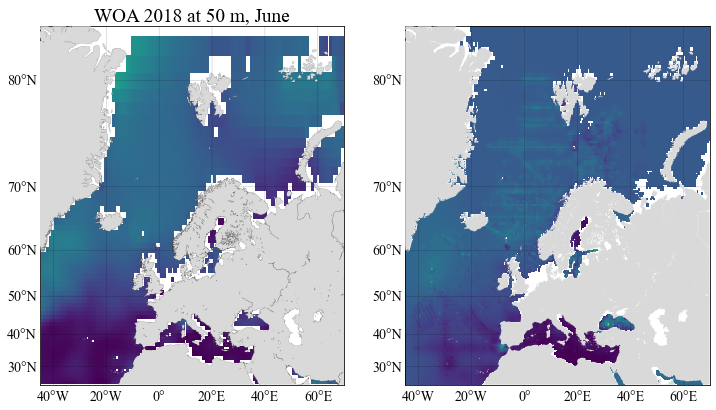

In [17]:
for month in range(2, 13):
    mm = str(month).zfill(2)
    logger.info(f"Working on month {calendar.month_name[month]}")
    woadataurl = f"https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/{varname}/all/1.00/woa18_all_{varname[0]}{mm}_01.nc"
    
    logger.info("Reading fields from WOA")
    lonwoa, latwoa, depthwoa, datewoa, oxywoa = emodnetchemistry.read_variable_woa(woadataurl, domain)
    logger.info("Found {} depth levels".format(len(depthwoa)))
    logger.info(datewoa)
    
    logger.info("Reading fields from DIVAnd")
    londiva, latdiva, depthdiva, datediva, oxydiva = emodnetchemistry.read_variable_diva(divafile, domain, 
                                                                       timeindex=month-1)
    logger.info("Found {} depth levels".format(len(depthdiva)))
    logger.info(datediva)
    
    llon1, llat1 = np.meshgrid(lonwoa, latwoa)
    llon2, llat2 = np.meshgrid(londiva, latdiva)
    
    # Loop on depths:
    # (depths are expected to be the same for the 2 products)
    for index2, d2 in enumerate(depthwoa):
        logger.info("Working on depth {}".format(d2))
        index1 = np.where(depthdiva == d2)[0][0]
        
        dd = str(int(d2)).zfill(4)
    
        logger.debug(f"index1 = {index1}, index2 = {index2}")
        figname = os.path.join(figdirmonth, f"{varname}_DIVAnd_WOA_month_{mm}_{dd}.jpg")
        emodnetchemistry.plot_WOA_DIVAnd_comparison(m, llon1, llat1, oxywoa[index1,:,:], 
                                                llon2, llat2, oxydiva[index2,:,:], 
                                                d2, figname=figname, vmin=0., vmax=2., deltavar=0.25,
                                                units=r"{} concentration ($\mu$moles/l)".format(varname.capitalize()),
                                                monthname=calendar.month_name[month])

## Vertical sections
### Meridional section

In [57]:
lonsection = -12.5
lonsel1 = np.where(lon1 == lonsection)[0][0]
lonsel2 = np.where(lon2 == lonsection)[0][0]

325

In [95]:
oxy_section1 = oxy1[:,:,lonsel1]
oxy_section2 = oxy2[:,:,lonsel2]
vmin = 200.
vmax = 400.
deltavar = 25.
units = r"$\mu$moles/kg"
figdir = "/home/ctroupin/dox/EMODnet-Chemistry/Sections/"
if not os.path.exists(figdir):
    os.mkdir(figdir)

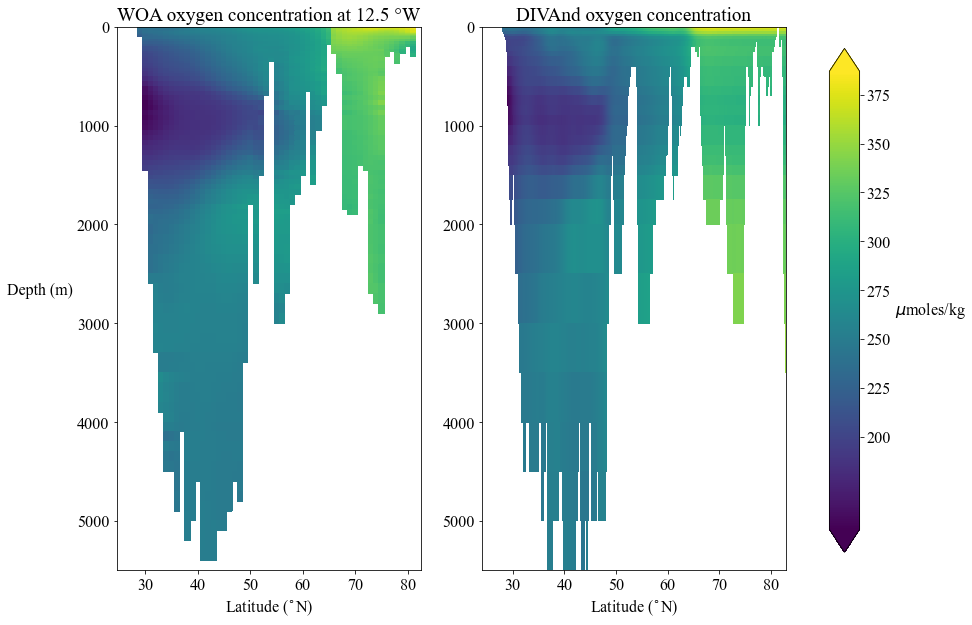

In [97]:
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(121)
pcm = plt.pcolormesh(lat1, depth1, oxy_section1)
plt.ylabel("Depth (m)", rotation=0, ha="right")
plt.xlabel("Latitude ($^{\circ}$N)")
plt.title(f"WOA oxygen concentration at {abs(lonsection)} °W")
ax1.invert_yaxis()

ax2 = plt.subplot(122)
pcm = plt.pcolormesh(lat2, depth2, oxy_section2)
plt.xlabel("Latitude ($^{\circ}$N)")
plt.title(f"DIVAnd oxygen concentration")

ax2.invert_yaxis()


cbar_ax = fig.add_axes([0.95, 0.15, 0.035, 0.7])
cb = plt.colorbar(pcm,  cax=cbar_ax, extend="both", orientation="vertical")
cb.set_label(units, rotation=0, ha="left")
cb.set_ticks(np.arange(vmin, vmax + 0.0001, deltavar))


if figname is not None:
    plt.savefig(os.path.join(figdir, "oxygen_section_12pt5W"), dpi=300, bbox_inches="tight")
# plt.show()
plt.close()

### Zonal section

In [100]:
latsection = 72.5
latsel1 = np.where(lat1 == latsection)[0][0]
latsel2 = np.where(lat2 == latsection)[0][0]

In [101]:
oxy_section1 = oxy1[:,latsel1,:]
oxy_section2 = oxy2[:,latsel2,:]

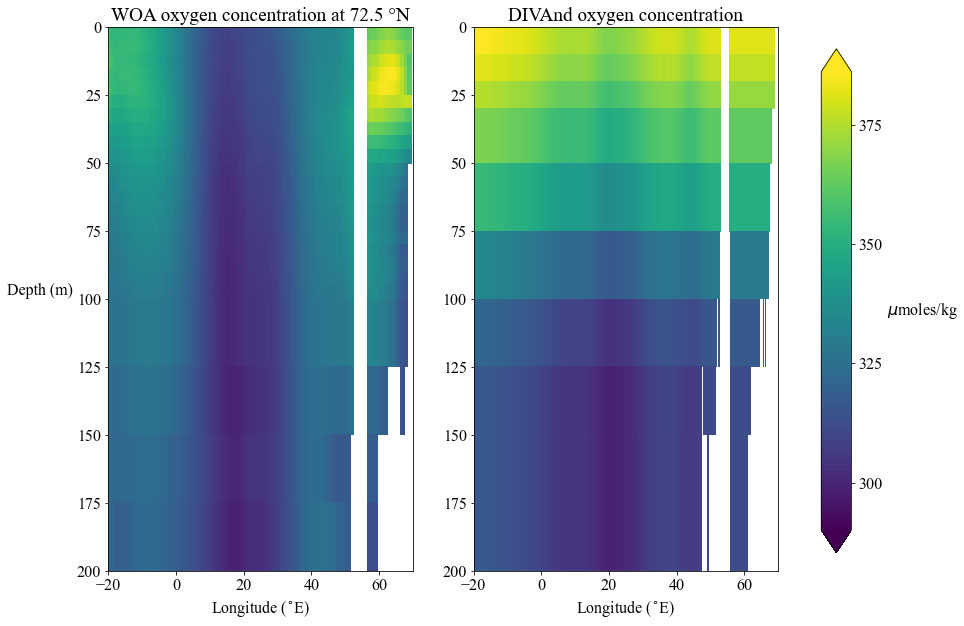

In [110]:
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(121)
pcm = plt.pcolormesh(lon1, depth1, oxy_section1)
plt.ylabel("Depth (m)", rotation=0, ha="right")
plt.xlabel("Longitude ($^{\circ}$E)")
plt.title(f"WOA oxygen concentration at {abs(latsection)} °N")
ax1.set_ylim(0., 200.)
ax1.set_xlim(-20., 70.)

ax1.invert_yaxis()

ax2 = plt.subplot(122)
pcm = plt.pcolormesh(lon2, depth2, oxy_section2)
plt.xlabel("Longitude ($^{\circ}$E)")
plt.title(f"DIVAnd oxygen concentration")
ax2.set_ylim(0., 200.)
ax2.set_xlim(-20., 70.)

ax2.invert_yaxis()

cbar_ax = fig.add_axes([0.95, 0.15, 0.035, 0.7])
cb = plt.colorbar(pcm,  cax=cbar_ax, extend="both", orientation="vertical")
cb.set_label(units, rotation=0, ha="left")
cb.set_ticks(np.arange(vmin, vmax + 0.0001, deltavar))


plt.savefig(os.path.join(figdir, "oxygen_section_72pt5N_zoom"), dpi=300, bbox_inches="tight")
# plt.show()
plt.close()